In [1]:
from keras import datasets
from keras.utils import np_utils
import keras
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

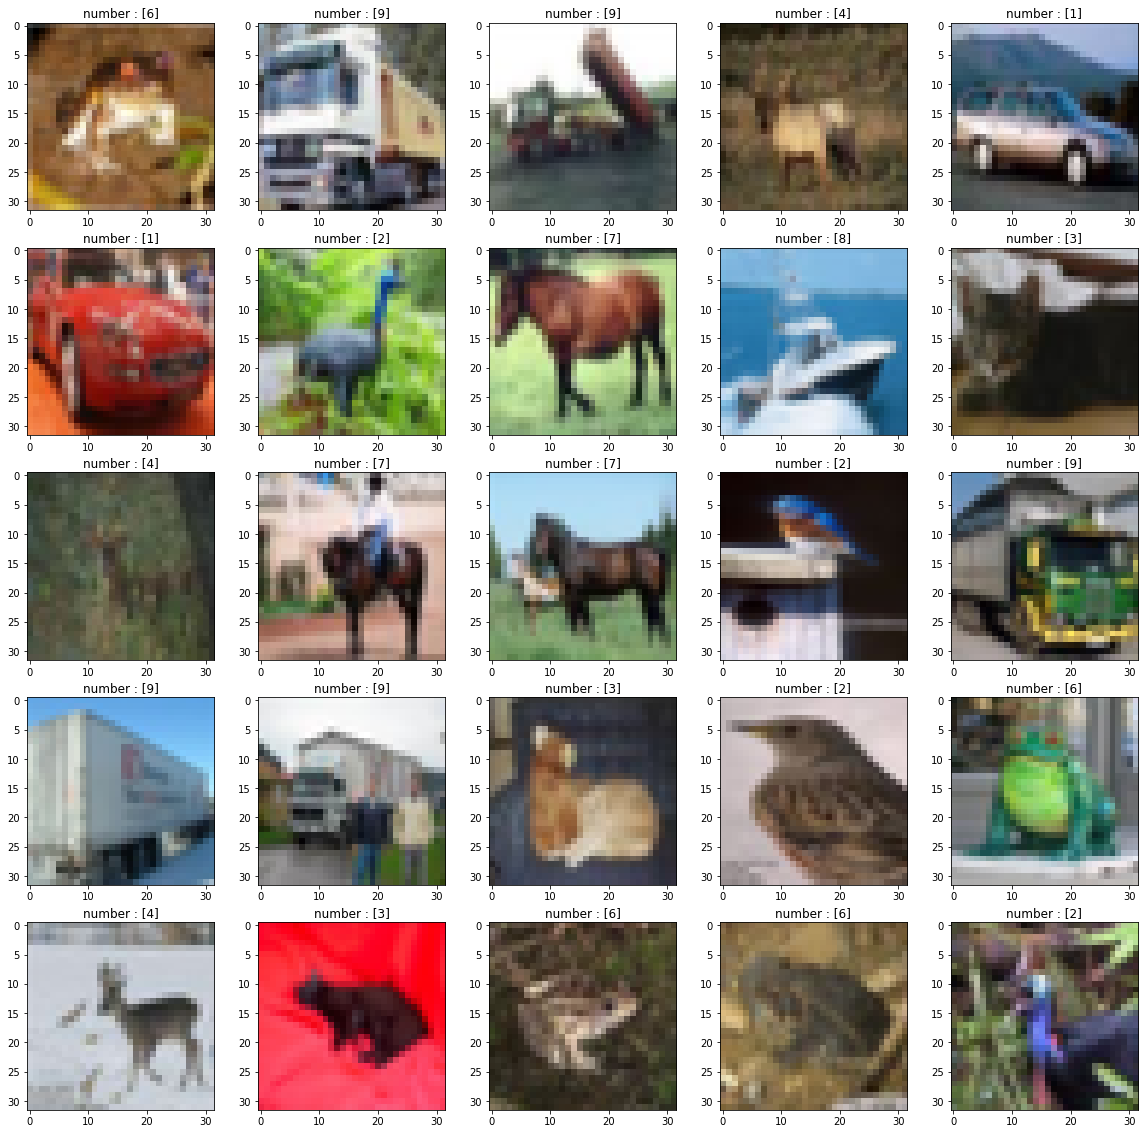

In [3]:
fig = plt.figure(figsize=(20,20))
for i in range(25):
    plt_temp = fig.add_subplot(5,5,i+1, title=("number : {}".format(y_train[i])))
    plt_temp.imshow(X_train[i])

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
L, W, H, C = X_train.shape

In [6]:
X_train = X_train.reshape(-1, W * H * C)
X_test = X_test.reshape(-1, W * H * C)

In [7]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train.shape

(50000, 3072)

In [10]:
model = keras.models.Sequential()


In [11]:
model.add(keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],), name='h1'))
model.add(keras.layers.Dropout(0))
model.add(keras.layers.Dense(50, activation='relu',name='h2'))
model.add(keras.layers.Dropout(0))
model.add(keras.layers.Dense(10, activation='softmax',name='h3'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_test, Y_test, epochs=10, batch_size=100, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 197us/step - loss: 2.1487 - acc: 0.2205 - val_loss: 2.0360 - val_acc: 0.2355
Epoch 2/10
8000/8000 [==============================] - 1s 132us/step - loss: 1.9377 - acc: 0.3090 - val_loss: 1.9306 - val_acc: 0.2990
Epoch 3/10
8000/8000 [==============================] - 1s 135us/step - loss: 1.8645 - acc: 0.3414 - val_loss: 1.8688 - val_acc: 0.3125
Epoch 4/10
8000/8000 [==============================] - 1s 137us/step - loss: 1.8121 - acc: 0.3595 - val_loss: 1.8483 - val_acc: 0.3500
Epoch 5/10
8000/8000 [==============================] - 1s 135us/step - loss: 1.7825 - acc: 0.3600 - val_loss: 1.7897 - val_acc: 0.3545
Epoch 6/10
8000/8000 [==============================] - 1s 137us/step - loss: 1.7220 - acc: 0.3896 - val_loss: 1.7614 - val_acc: 0.3675
Epoch 7/10
8000/8000 [==============================] - 1s 137us/step - loss: 1.6869 - acc: 0.4100 - val_loss: 1.8346 - val_acc: 0.3300


In [14]:
model_test = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 55us/step


In [15]:
model_test

[1.6210047365188598, 0.427]

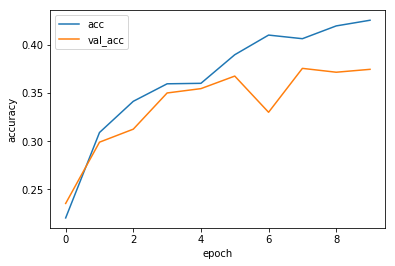

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc=0)
